# Getting Prototypes

In [1]:
cd ../..

/home/jovyan/pyminimax


In [2]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing pyminimax.egg-info/PKG-INFO
writing dependency_links to pyminimax.egg-info/dependency_links.txt
writing requirements to pyminimax.egg-info/requires.txt
writing top-level names to pyminimax.egg-info/top_level.txt
reading manifest file 'pyminimax.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'pyminimax.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/pyminimax
copying build/lib/pyminimax/__init__.py -> build/bdist.linux-x86_64/egg/pyminimax
copying build/lib/pyminimax/_minimax.py -> build/bdist.linux-x86_64/egg/pyminimax
byte-compiling build/bdist.linux-x86_64/egg/pyminimax/__init__.py to __init__.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/pyminimax/_minimax.py to _minimax.cpython-37.pyc
creating build/bdist.linux-x86_64/egg/EGG-INFO
cop

In [3]:
from pyminimax import minimax
from scipy.spatial.distance import pdist
import numpy as np

np.random.seed(0)
X = np.random.rand(12, 2)

Z = minimax(pdist(X), return_prototype=True)

Z

array([[ 0.        , 11.        ,  0.10907128,  2.        ,  0.        ],
       [ 3.        , 12.        ,  0.11378059,  3.        , 11.        ],
       [ 2.        , 13.        ,  0.13984741,  4.        , 11.        ],
       [ 6.        , 14.        ,  0.18000197,  5.        , 11.        ],
       [ 1.        ,  5.        ,  0.18963685,  2.        ,  1.        ],
       [ 9.        , 10.        ,  0.21261486,  2.        ,  9.        ],
       [ 4.        , 16.        ,  0.2252094 ,  3.        ,  5.        ],
       [17.        , 18.        ,  0.34138697,  5.        ,  5.        ],
       [ 8.        , 15.        ,  0.42153982,  6.        ,  3.        ],
       [19.        , 20.        ,  0.54148195, 11.        ,  0.        ],
       [ 7.        , 21.        ,  0.66072543, 12.        ,  2.        ]])

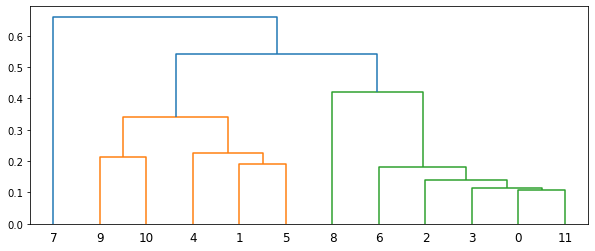

In [4]:
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 4))
dendrogram(Z[:, :4])
plt.show()

In [5]:
from pandas import DataFrame

DataFrame(Z, columns=['x', 'y', 'dist', 'num_pts', 'prototype']).astype({'x': int, 'y': int, 'num_pts': int, 'prototype': int})

,x,y,dist,num_pts,prototype
0,0,11,0.109071,2,0
1,3,12,0.113781,3,11
2,2,13,0.139847,4,11
3,6,14,0.180002,5,11
4,1,5,0.189637,2,1
5,9,10,0.212615,2,9
6,4,16,0.225209,3,5
7,17,18,0.341387,5,5
8,8,15,0.421540,6,3
9,19,20,0.541482,11,0


In [6]:
from scipy.cluster.hierarchy import fcluster
from collections import defaultdict

fclust = fcluster(Z[:, :4], t=0.3, criterion='distance')
idx2clust = dict(enumerate(fclust))     # map from data point index to cluster
n = len(fclust)

clust_dict = defaultdict(set)           # map from cluster to set of indices
for idx, clust in enumerate(fclust):
    clust_dict[clust].add(idx)

protos = {}

for cidx, cset in clust_dict.copy().items():
    if len(cset)==1:
        idx = cset.pop()
        protos[cidx] = idx
        idx2clust.pop(idx)
        clust_dict.pop(cidx)
        
for x, y, _, _, proto in Z:
    if x < n and x in idx2clust:
        clust = idx2clust[x]
        clust_dict[clust].remove(x)
        if clust_dict[clust] == set([]):
            protos[clust] = proto
    if y < n and y in idx2clust:
        clust = idx2clust[y]
        clust_dict[clust].remove(y)
        if clust_dict[clust] == set([]):
            protos[clust] = proto

from pandas import Series
Series(protos).to_frame()

,0
5,7.0
4,8.0
3,11.0
1,9.0
2,5.0
